Notebook to compare model nowcasts with data from a few ONC moorings. Really, only the JDF AS04 has data overlapping data.

Observations are from Ocean Networks Canada.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ONC
from salishsea_tools import tidetools, viz_tools
import netCDF4 as nc
import datetime
from scipy import interpolate as interp

from nowcast import analyze

%matplotlib inline


In [2]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_AS04Mooring_CTD_20131011T230027Z_20161027T212203Z-NaN_clean.csv')


In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
results_home = '/results/SalishSea/nowcast/'

# Strait of Juan de Fuca - AS04

## Daily Averages
Options for hourly averages exist

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 117.0
Model bathymetry: 117.0


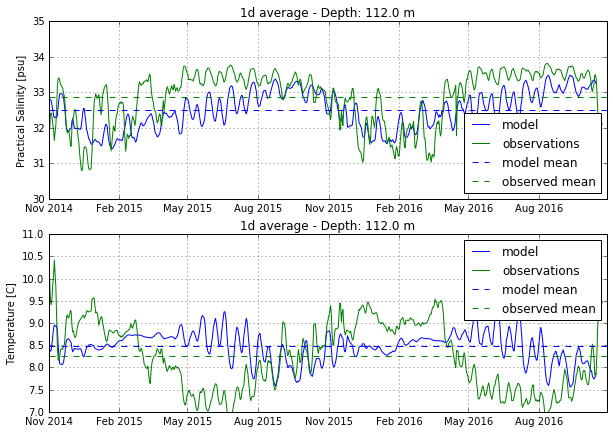

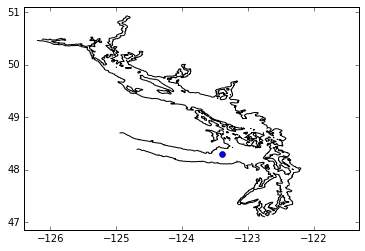

In [4]:
sdt=datetime.datetime(2014, 11, 1)
edt = datetime.datetime(2016, 10, 28)
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1d', 
                                smin=30, smax=35, tmin=7, tmax=11, interp=True)

How is model depth lower than bathymetry? Probably because partial steps enables us to have a grid point at this (k, j, i) but this point isn't actually as deep as what is stored in the deptht array. Where can I get the partial steps depth -- mesh_mask.nc file I believe.

* We are not capturing the monthly variability at all. Why? What is the source of deep water at this location?

# Boundary Pass

In [5]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/BoundaryPass//'
               'BoundaryPass_BoundaryPassMooring_CTD_20130418T192032Z_20161021T231158Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2016,11,11)
results_home = '/results/SalishSea/nowcast/'

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 205.0
Model bathymetry: 205.0


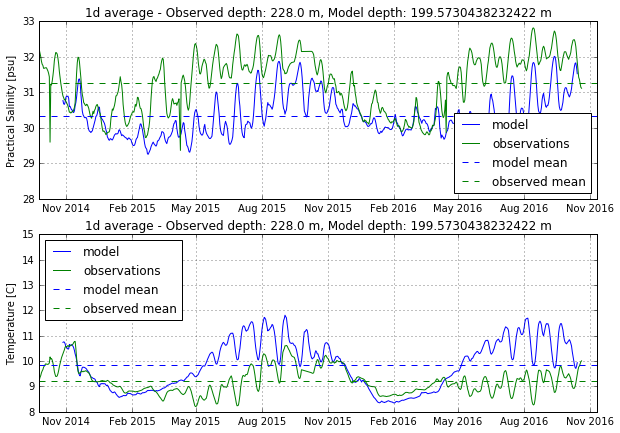

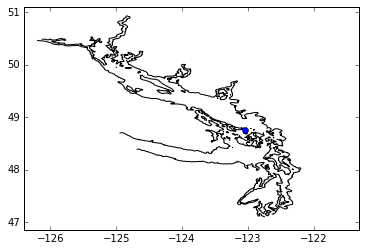

In [6]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1d', interp=False,
                                smin=28, smax=33, tmin=8, tmax=15)

* Mooring is about 30 m deeper than the model bathymetry at this location. So, I can't interpolate to this depth since it is outside of the model depth range. 
* Our daily 'fresh/warm pulses' look good - about the right amplitude and timing. Maybe a little bit strong in the amplitude.   
* On average, we are too fresh (~1psu) and too warm (~1degC). But, we are also 30 m higher in depth. 
* These comparisons are at the very start of our nowcasts. Unfortunately, we don't have any more recent data.

# JFCN

In [7]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_JFCNMooring_CTD_20131025T180034Z_20150911T234539Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2015,9,12)
results_home = '/results/SalishSea/nowcast/'

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 234.375
Model bathymetry: 234.375


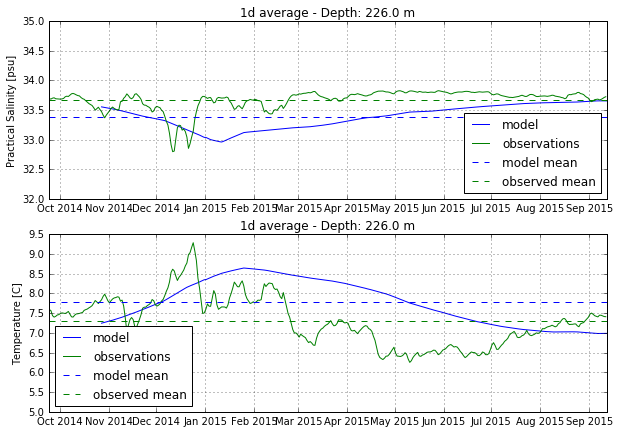

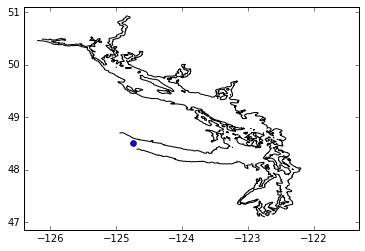

In [8]:
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1d', interp=True,
                                    smin=32, smax=35, tmin=5, tmax=9.5)

# Macaulay

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:37: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data = data.convert_objects(convert_numeric=True)
/data/nsoontie/MEOPAR/analysis-nancy/notebooks/strat/comparisons/ONC.py:205: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data_r = data.resample(r, how='mean', base=0.5)
/data/nsoontie/MEOPAR/tools/SalishSeaNowcast/nowcast/analyze.py:171: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kss == 'None':


Model bathymetry: 55.0
Model bathymetry: 55.0


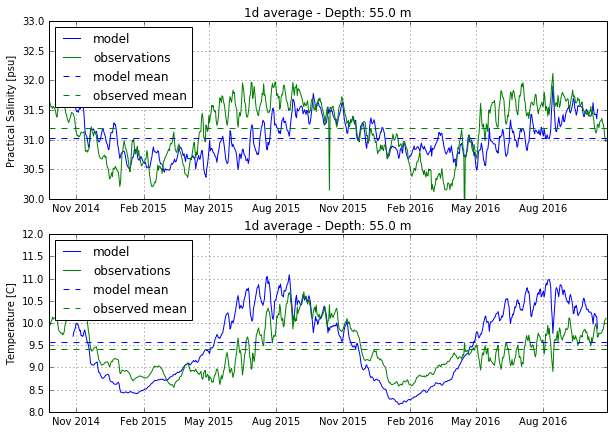

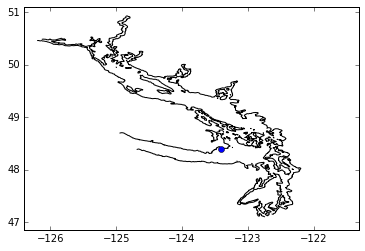

In [9]:
csvfilename = ('/ocean/nsoontie/MEOPAR/ONC/JDF/'
               'JuandeFucaStrait_MacaulayOutfallMooring_CTD_20140417T173026Z_20161026T235626Z-NaN_clean.csv')
sdt=datetime.datetime(2014,9,24)
edt=datetime.datetime(2016,10,27)
results_home = '/results/SalishSea/nowcast/'
figmap, fig = ONC.compare_ONC_model(csvfilename, sdt, edt, grid_B, results_home, period='1d', interp=True,
                                smin=30, smax=33, tmin=8, tmax=12)